In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

plt.style.use("ggplot")
mpl.rcParams["axes.unicode_minus"] = False

In [3]:
train = pd.read_csv("./bike/train.csv", parse_dates = ["datetime"])
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [5]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [6]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
train["year"] = train["datetime"].apply(lambda x : x.year)
train["month"] = train["datetime"].apply(lambda x : x.month)
train["day"] = train["datetime"].apply(lambda x : x.day)
train["hour"] = train["datetime"].apply(lambda x : x.hour)
train["minute"] = train["datetime"].apply(lambda x : x.minute)
train["second"] = train["datetime"].apply(lambda x : x.second)
train.shape

(10886, 18)

In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0.5, 0, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

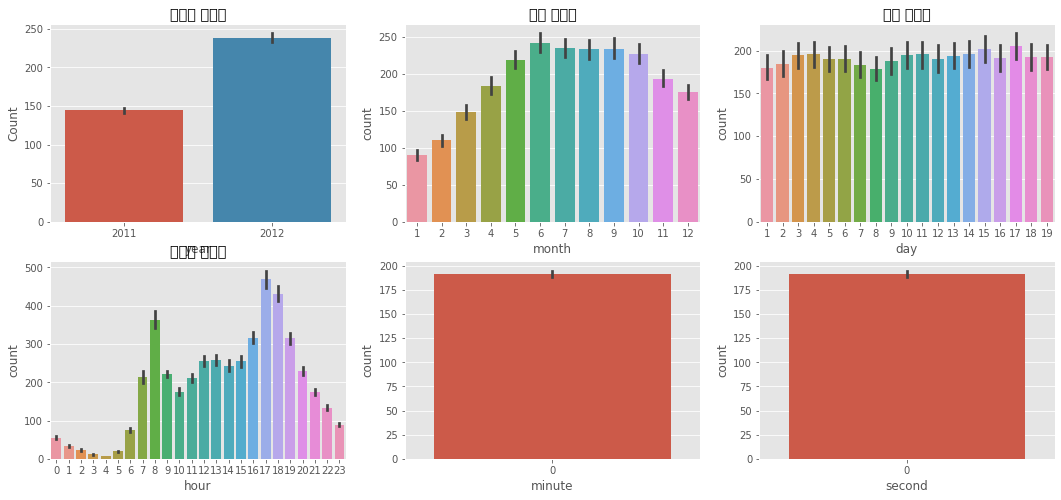

In [9]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18, 8)

sns.barplot(data = train, x = "year", y = "count", ax = ax1)
sns.barplot(data = train, x = "month", y = "count", ax = ax2)
sns.barplot(data = train, x = "day", y = "count", ax = ax3)
sns.barplot(data = train, x = "hour", y = "count", ax = ax4)
sns.barplot(data = train, x = "minute", y = "count", ax = ax5)
sns.barplot(data = train, x = "second", y = "count", ax = ax6)

ax1.set(ylabel = "Count", title = "연도별 대여량")
ax2.set(xlabel = "month", title = "월별 대여량")
ax3.set(xlabel = "day", title = "일별 대여량")
ax4.set(xlabel = "hour", title = "시간별 대여량")

* 연도별 대여량은 2011년보다 2012년이 더 많다
* 월별 대여량은 6월에 가장 많고 7~10월도 대여량이 많다. 그리고 1월에 가장 적다.
* 일별대여량은 1일부터 19일까지만 있고 나머지 날짜는 test.csv에 있다. 그래서 이 데이터는 피처로 사용하면 안된다.
* 시간 대 대여량을 보면 출퇴근 시간에 대여량이 많은것 같다. 하지만 주말과 나누어 볼 필요가 있을것 같다.
* 분, 초도 다 0이기 때문에 의미가 없다.

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Working Day'), Text(0.5, 1.0, '근무일 여부')]

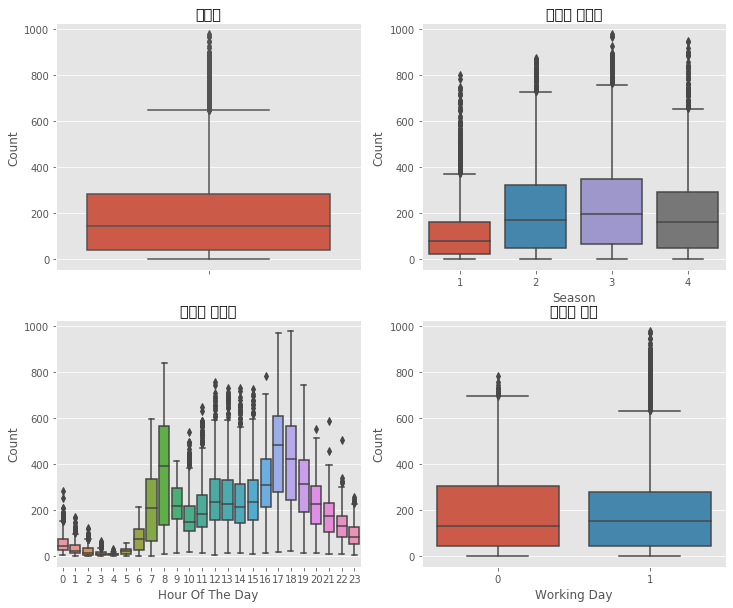

In [14]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(12, 10)
cols = [[None, "season"], ["hour", "workingday"]]
for i, col in enumerate(cols):
    for j, c in enumerate(col):
        sns.boxplot(data = train, y = "count", x = c, orient = "v", ax = axes[i][j])
axes[0][0].set(ylabel = "Count", title = "대여량")
axes[0][1].set(xlabel = "Season", ylabel = "Count", title = "계절별 대여량")
axes[1][0].set(xlabel = "Hour Of The Day", ylabel = "Count", title = "시간별 대여량")
axes[1][1].set(xlabel = "Working Day", ylabel = "Count", title = "근무일 여부")

In [15]:
train["dayofweek"] = train.datetime.apply(lambda x : x.dayofweek)
print(train.shape)

(10886, 19)


In [16]:
train["dayofweek"].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

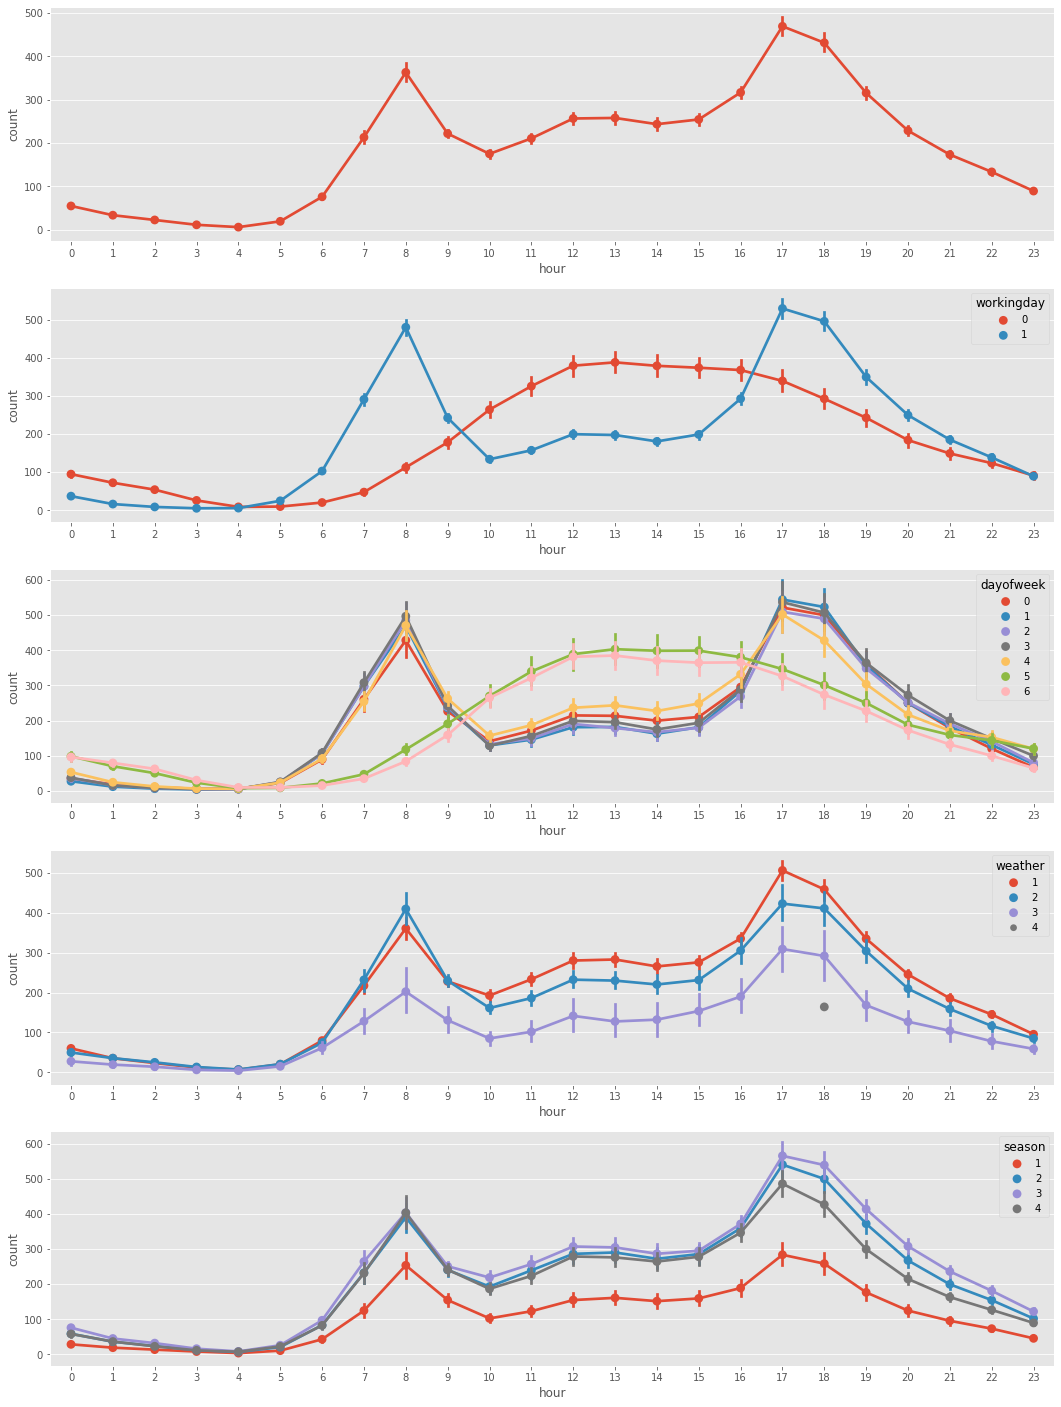

In [17]:
fig, axes = plt.subplots(nrows = 5)
fig.set_size_inches(18, 25)

cols = [None,"workingday", "dayofweek", "weather", "season"]
for i, col in enumerate(cols):
    sns.pointplot(data = train, x = "hour", y = "count", hue = col, ax = axes[i])

In [20]:
corrMatt = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()
print(corrMatt)
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


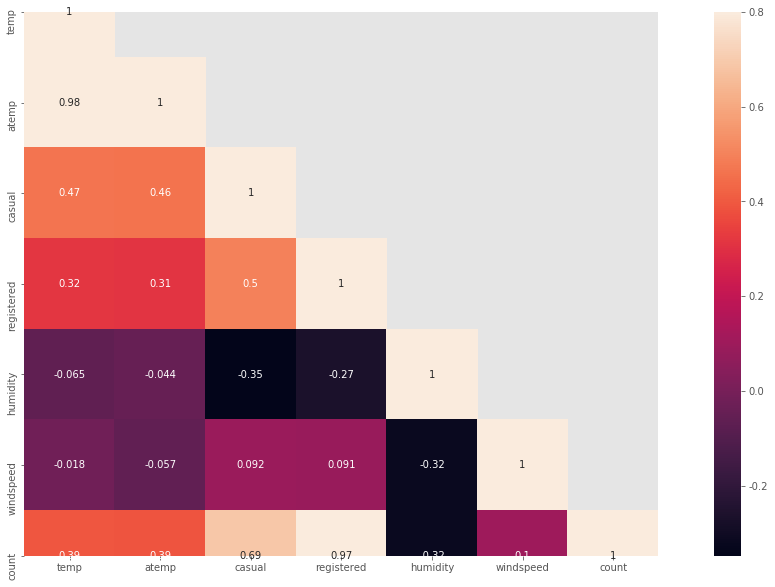

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(20 ,10)
sns.heatmap(corrMatt, mask = mask, vmax = .8, square = True, annot = True)

* 온도, 습도, 풍속은 거의 연관관계가 없다.
* 대여량과 가장 연관이 높은 건 registered로 등록 된 대여자가 많지만, test 데이터에는 이 값이 없다.
* atemp와 temp는 0.98로 상관관계가 높지만 온도와 체감온도로 피처로 사용하기에 적합하지 않을 수 있다.

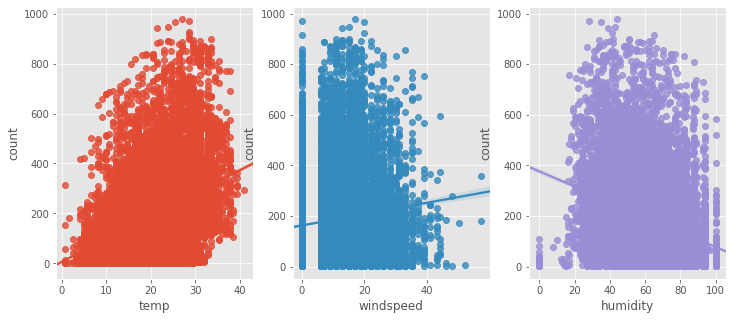

In [28]:
fig, axes = plt.subplots(ncols = 3)
fig.set_size_inches(12, 5)
cols = ["temp", "windspeed", "humidity"]
for i, col in enumerate(cols):
    sns.regplot(x = col, y = "count", data = train, ax = axes[i])

* 풍속의 경우 0에 숫자가 몰려있는 것으로 보인다. 아마도 관측되지 않는 수치에 대해 0으로 기록된 것이 아닐까 추측해본다.

In [29]:
train["year_month"] = train["datetime"].apply(lambda x : "{0}-{1}".format(x.year, x.month))
print(train.shape)
train[["datetime", "year_month"]].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


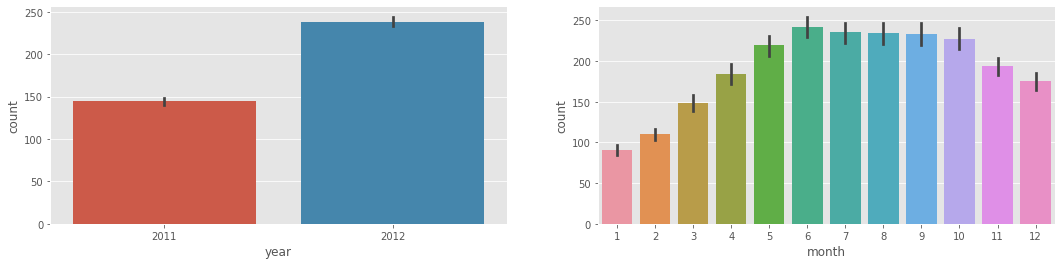

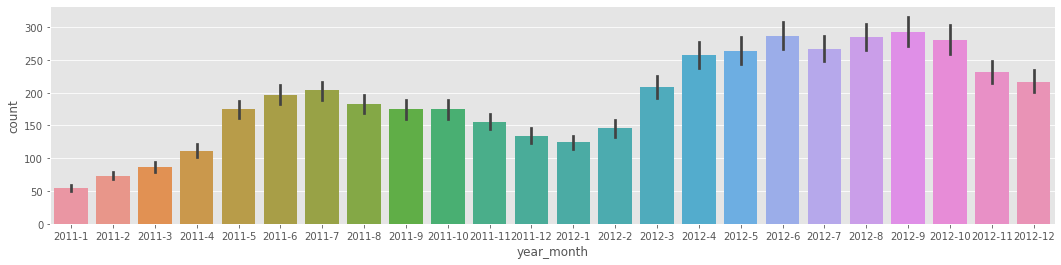

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(18, 4)

sns.barplot(data = train, x = "year", y = "count", ax = ax1)
sns.barplot(data = train, x = "month", y = "count", ax = ax2)

fig, ax3 = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(18, 4)

sns.barplot(data = train, x = "year_month", y = "count", ax = ax3)

* 2011년보다 2012년의 대여량이 더 많다.
* 겨울보다는 여름에 대여량이 많다.
* 2011년과 2012년의 월별 데이터를 이어보면 전체적으로 증가하는 추세이다.

In [33]:
trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean())  <= (3 * train["count"].std())]
print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909612))

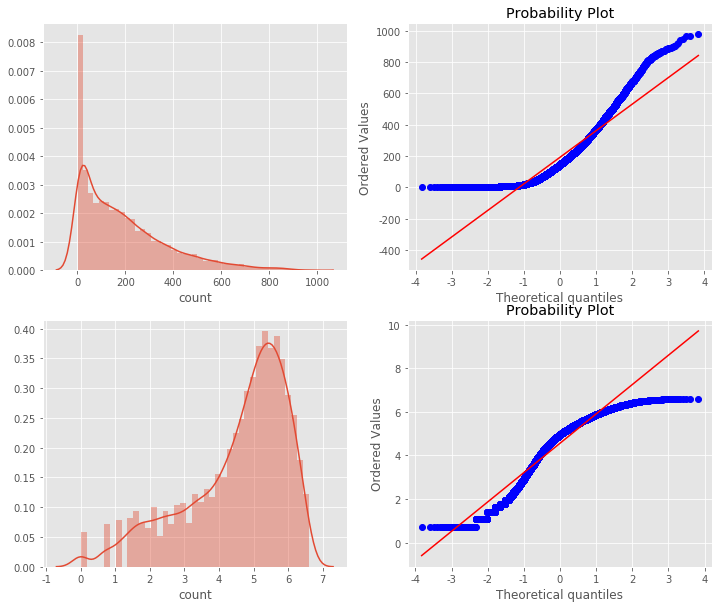

In [34]:
# count값으 데이터 분포
figure, axes = plt.subplots(ncols = 2, nrows = 2)
figure.set_size_inches(12, 10)

sns.distplot(train["count"], ax = axes[0][0])
stats.probplot(train["count"], dist = "norm", fit = True, plot = axes[0][1])
sns.distplot(np.log(trainWithoutOutliers["count"]), ax = axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist = "norm", fit = True, plot = axes[1][1])

count변수가 오른쪽으로 치우쳐져 있다. 대부분의 기계학습은 종속변수가 normal이어야 하기에 정규분포를 갖는 것이 바람직하다. 대안으로 outlier data를 제거하고 "count"변수에 로그를 씌워 변경해 봐도 정규분포를 따르지 않지만 이전 그래프보다는 좀 더 자세히 표현하고 있다.